In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# import kaggle dataset through the file path
df = pd.read_csv("C:/Users/justi/OneDrive/Desktop/digital_marketing_campaign_dataset.csv")
# display info about this file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

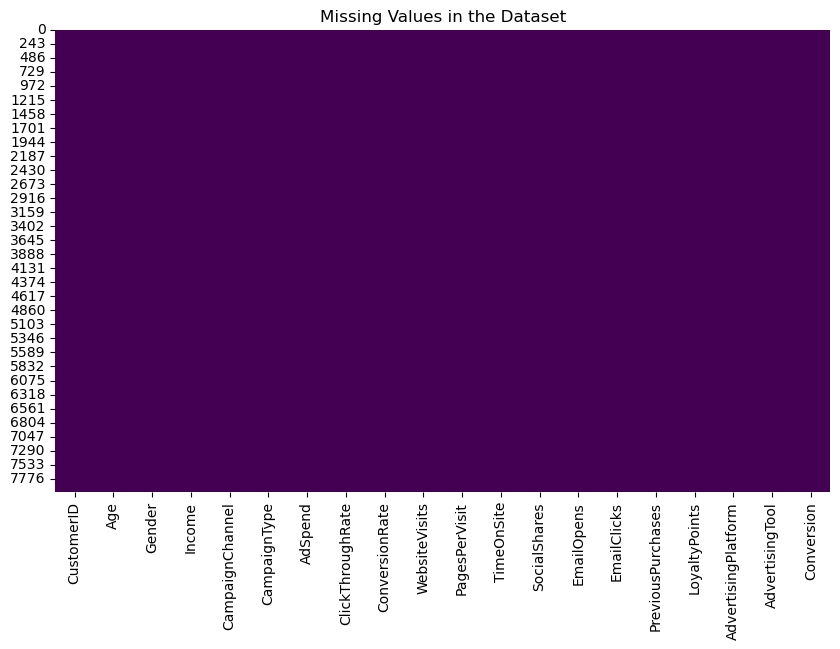

In [4]:
# check and visualize any missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in the Dataset")
plt.show()

In [6]:
# drop unnecessary columns
df_cleaned = df.drop(columns=['CustomerID'])

In [8]:
# convert categorical columns to 'category' dtype
df_cleaned['Gender'] = df_cleaned['Gender'].astype('category')
df_cleaned['CampaignChannel'] = df_cleaned['CampaignChannel'].astype('category')
df_cleaned['CampaignType'] = df_cleaned['CampaignType'].astype('category')
df_cleaned['AdvertisingPlatform'] = df_cleaned['AdvertisingPlatform'].astype('category')

# review cleaned data
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  8000 non-null   int64   
 1   Gender               8000 non-null   category
 2   Income               8000 non-null   int64   
 3   CampaignChannel      8000 non-null   category
 4   CampaignType         8000 non-null   category
 5   AdSpend              8000 non-null   float64 
 6   ClickThroughRate     8000 non-null   float64 
 7   ConversionRate       8000 non-null   float64 
 8   WebsiteVisits        8000 non-null   int64   
 9   PagesPerVisit        8000 non-null   float64 
 10  TimeOnSite           8000 non-null   float64 
 11  SocialShares         8000 non-null   int64   
 12  EmailOpens           8000 non-null   int64   
 13  EmailClicks          8000 non-null   int64   
 14  PreviousPurchases    8000 non-null   int64   
 15  LoyaltyPoints        

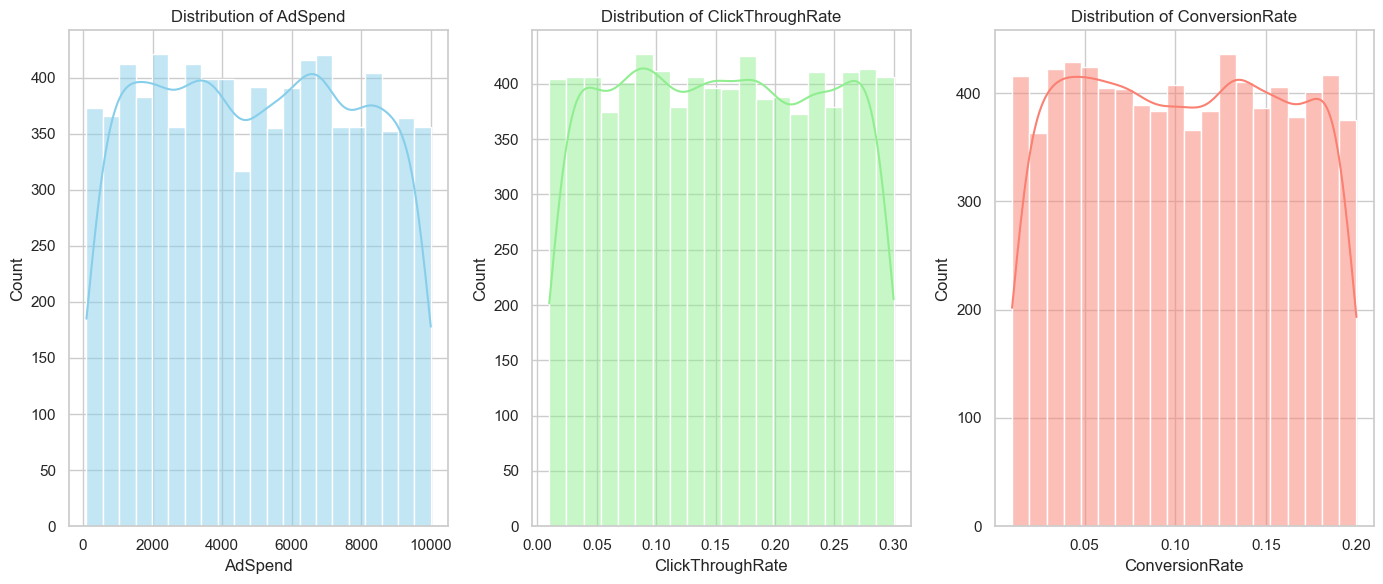

In [10]:
# exploratory data analysis (EDA)

# set the style for visualizations
sns.set(style="whitegrid")

# distribution of 'AdSpend', 'ClickThroughRate', and 'ConversionRate'
plt.figure(figsize=(14, 6))

# subplot 1: distribution of 'AdSpend'
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['AdSpend'], kde=True, color='skyblue')
plt.title('Distribution of AdSpend')

# subplot 2: distribution of 'ClickThroughRate'
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['ClickThroughRate'], kde=True, color='lightgreen')
plt.title('Distribution of ClickThroughRate')

# subplot 3: distribution of 'ConversionRate'
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['ConversionRate'], kde=True, color='salmon')
plt.title('Distribution of ConversionRate')

plt.tight_layout()
plt.show()

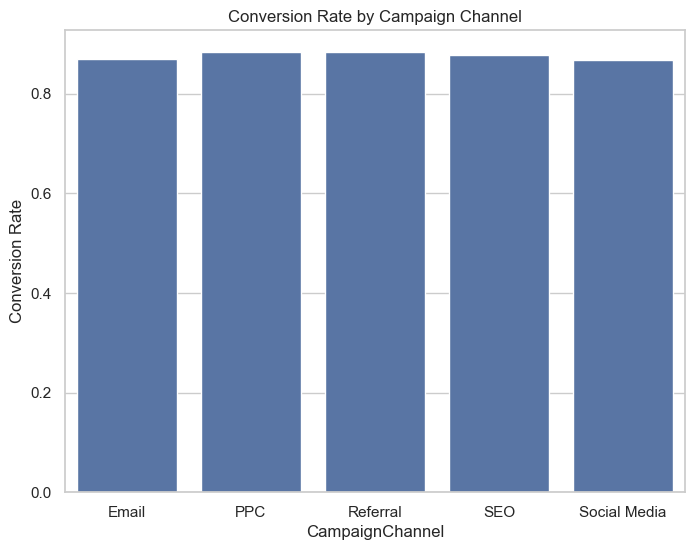

In [12]:
# conversion rate per 'CampaignChannel'
plt.figure(figsize=(8, 6))
sns.barplot(x='CampaignChannel', y='Conversion', data=df_cleaned, estimator=lambda x: sum(x) / len(x), errorbar=None)
plt.title('Conversion Rate by Campaign Channel')
plt.ylabel('Conversion Rate')
plt.show()

In [14]:
# prepare the data for ANOVA test by campaign channel
channels = df_cleaned['CampaignChannel'].unique()
conversion_by_channel = [df_cleaned[df_cleaned['CampaignChannel'] == channel]['Conversion'] for channel in channels]

# perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*conversion_by_channel)

# display the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 0.6960206721427569
P-value: 0.5946070531108417


In [16]:
# logistic regression with SMOTE to balance the dataset and improve the model

# select relevant features for prediction
features = ['AdSpend', 'ClickThroughRate', 'ConversionRate', 'Income', 'Age']
X = df_cleaned[features]

# encode the target variable (Conversion)
y = df_cleaned['Conversion']

# apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# split the resampled data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# fit the logistic regression model
log_model_smote = LogisticRegression(max_iter=1000)
log_model_smote.fit(X_train, y_train)

# make predictions
y_pred_smote = log_model_smote.predict(X_test)

# evaluate the model
print("Classification Report (SMOTE):\n", classification_report(y_test, y_pred_smote))
print("Confusion Matrix (SMOTE):\n", confusion_matrix(y_test, y_pred_smote))

Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.61      0.63      0.62      1377
           1       0.63      0.61      0.62      1428

    accuracy                           0.62      2805
   macro avg       0.62      0.62      0.62      2805
weighted avg       0.62      0.62      0.62      2805

Confusion Matrix (SMOTE):
 [[874 503]
 [558 870]]


In [18]:
# tuning the model

# define the parameter grid for tuning
# regularization strength
# different solvers for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'lbfgs']  
}

# initialize the logistic regression model
log_model = LogisticRegression(max_iter=1000)

# perform grid search with cross-validation (5-fold)
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# fit the model on the training data
grid_search.fit(X_train, y_train)

# display the best parameters found by the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# show classification report and confusion matrix for the tuned model
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_best))
print("Tuned Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 100, 'solver': 'lbfgs'}
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.62      1377
           1       0.64      0.61      0.62      1428

    accuracy                           0.62      2805
   macro avg       0.62      0.62      0.62      2805
weighted avg       0.62      0.62      0.62      2805

Tuned Confusion Matrix:
 [[877 500]
 [556 872]]
